In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os.path

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from random import randrange
from PIL import Image

In [2]:
def draw_image(fig_num, img, title):
    plt.figure(fig_num)
    plt.imshow(img, cmap='jet')
    plt.colorbar()
    plt.title(title)
    return

In [3]:
TRAIN_PATH = "C:/Users/UKGC/Desktop/FYP/Datasets/CNN_train/"
TEST_PATH = "C:/Users/UKGC/Desktop/FYP/Datasets/CNN_test/"

In [145]:
def multi_generator(generator, subset, x1_dir, x2_dir, x3_dir, x4_dir, y1_dir):   
    genX1 = generator.flow_from_directory(
        x1_dir,
        target_size=(64,64),
        color_mode="grayscale",
        class_mode=None,
        batch_size=20,
        shuffle=False,
        seed=23,
        subset=subset
    )
    genX2 = generator.flow_from_directory(
        x2_dir,
        target_size=(64,64),
        color_mode="grayscale",
        class_mode=None,
        batch_size=20,
        shuffle=False,
        seed=23,
        subset=subset
    )
    genX3 = generator.flow_from_directory(
        x3_dir,
        target_size=(64,64),
        color_mode="grayscale",
        class_mode=None,
        batch_size=20,
        shuffle=False,
        seed=23,
        subset=subset
    )
    genX4 = generator.flow_from_directory(
        x4_dir,
        target_size=(64,64),
        color_mode="grayscale",
        class_mode=None,
        batch_size=20,
        shuffle=False,
        seed=23,
        subset=subset
    )
    genY1 = generator.flow_from_directory(
        y1_dir,
        target_size=(64,64),
        color_mode="grayscale",
        class_mode=None,
        batch_size=20,
        shuffle=False,
        seed=23,
        subset=subset
    )

    while True:
        X1i = next(genX1)
        X2i = next(genX2)
        X3i = next(genX3)
        X4i = next(genX4)
        Y1i = next(genY1)
        yield np.concatenate((X1i, X3i), 3), Y1i
        #yield X1i, Y1i
        
        
def single_generator(generator, x1_dir, subset):
    genX1 = generator.flow_from_directory(
        x1_dir,
        target_size=(64,64),
        color_mode="grayscale",
        class_mode=None,
        batch_size=32,
        shuffle=True,
        seed=23,
        subset=subset
    )

    while True:
        X1i = next(genX1)
        yield X1i

In [77]:
train_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)
test_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

target_size = (64,64)
color_mode = "grayscale"
class_mode = None
batch_size = 64
shuffle = True
seed = 23

In [146]:
train_data = multi_generator(train_generator,
                             "training",
                             TRAIN_PATH+"AA_LBP_image",
                             TRAIN_PATH+"ToF_LBP_image",
                             TRAIN_PATH+"AA_LBPTH_image",
                             TRAIN_PATH+"avg_image",
                             TRAIN_PATH+"True_image")
valid_data = multi_generator(train_generator,
                             "validation",
                             TRAIN_PATH+"AA_LBP_image",
                             TRAIN_PATH+"ToF_LBP_image",
                             TRAIN_PATH+"AA_LBPTH_image",
                             TRAIN_PATH+"avg_image",
                             TRAIN_PATH+"True_image")
test_data = multi_generator(test_generator,
                             None,
                             TEST_PATH+"AA_LBP_image",
                             TEST_PATH+"ToF_LBP_image",
                             TEST_PATH+"AA_LBPTH_image",
                             TEST_PATH+"avg_image",
                             TEST_PATH+"True_image")

In [43]:
model = keras.Sequential(
    [
        keras.Input(shape=(64,64, 4)),
        layers.Conv2D(16, 3, padding="same"),
        layers.BatchNormalization(),
        layers.ReLU(),

        layers.Conv2D(16, 3, padding="same", dilation_rate=1),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Conv2D(16, 3, padding="same", dilation_rate=1),
        layers.BatchNormalization(),
        layers.ReLU(),  

        layers.Conv2D(16, 3, padding="same", dilation_rate=2),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Conv2D(16, 3, padding="same", dilation_rate=2),
        layers.BatchNormalization(),
        layers.ReLU(),

        layers.Conv2D(16, 3, padding="same", dilation_rate=4),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Conv2D(16, 3, padding="same", dilation_rate=4),
        layers.BatchNormalization(),
        layers.ReLU(),

        layers.Conv2D(16, 3, padding="same", dilation_rate=8),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Conv2D(16, 3, padding="same", dilation_rate=8),
        layers.BatchNormalization(),
        layers.ReLU(),

        layers.Conv2D(16, 3, padding="same", dilation_rate=16),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Conv2D(16, 3, padding="same", dilation_rate=16),
        layers.BatchNormalization(),
        layers.ReLU(),

        layers.Conv2D(1, 3, padding="same", activation="relu")
    ]
)
model.compile(
    loss = keras.losses.MeanSquaredError(),
    optimizer = keras.optimizers.Adam(),
    metrics=["accuracy"],
)

In [44]:
history = model.fit(
    x = train_data,
    validation_data=valid_data,
    steps_per_epoch=6000//batch_size,
    validation_steps=1500//batch_size,
    epochs=2,
    verbose=1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True,),
        tf.keras.callbacks.ModelCheckpoint(
        filepath="C:/Users/UKGC/Desktop/FYP/Models/Temp/",
        save_best_only=True,
        monitor='val_accuracy',
        mode='max',
        save_freq='epoch'),
    ]
)

Epoch 1/2
93/93 [==============================] - 94s 1s/step - loss: 0.0467 - accuracy: 0.9564 - val_loss: 0.0544 - val_accuracy: 0.9432
Epoch 2/2
93/93 [==============================] - 86s 928ms/step - loss: 0.0127 - accuracy: 0.9846 - val_loss: 0.0554 - val_accuracy: 0.9427


In [147]:
model = keras.models.load_model("C:/Users/UKGC/Desktop/FYP/Models/ImgEnhCnn_aa_lbp2")

In [148]:
pred_imgs, true_img = next(test_data)

Found 20 images belonging to 1 classes.
Found 20 images belonging to 1 classes.
Found 20 images belonging to 1 classes.
Found 20 images belonging to 1 classes.
Found 20 images belonging to 1 classes.


In [155]:
print(pred_imgs.shape)
print(true_img.shape)
predictions1 = model.predict(pred_imgs)
predictions = np.squeeze(predictions1)
print(predictions.shape)

(20, 64, 64, 2)
(20, 64, 64, 1)
(20, 64, 64)


In [157]:
score = model.evaluate(test_data, steps=20)

20/20 [==============================] - 2s 98ms/step - loss: 0.0063 - accuracy: 0.9931


In [156]:
index = [1, 6, 2, 18, 20, 16]

for i in range(1, 21):
    current_avg_img = predictions[i-1] / np.max(predictions[i-1])
    current_avg_img = current_avg_img * 255
    image_mat = (current_avg_img).astype(np.uint8)
    image = Image.fromarray(image_mat)
    image.save("C:/Users/UKGC/Desktop/FYP/Datasets/CNN_test/Results_aa_lbp2/pred"+str(i)+".png")

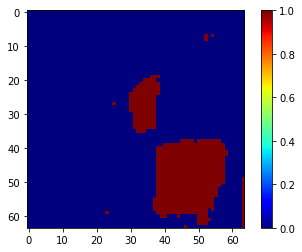

In [153]:
draw_image(1, predictions[5], "")

In [151]:
for i in range(0, 20):
    image = predictions[i]
    image[image!=0] = 1
    predictions[i] = image

In [152]:
mse = keras.losses.MeanSquaredError()

c = mse(true_img, np.reshape(predictions, (20, 64, 64, 1))).numpy()
print(c)

0.0170166


In [119]:
predictions[0].shape

(64, 64)